<a href="https://colab.research.google.com/github/Nagmashaik123/Section203-Group06/blob/main/LDA_Analysis_Vacc_Brands.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
import re
import os
import io
import spacy
import string
import numpy as np
import pandas as pd

# Gensim
import gensim
from gensim import models
import gensim.corpora as corpora
from gensim.models import Phrases
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import warnings
warnings.filterwarnings('ignore')


# Read and Prepare Dataset

In [2]:
dataset = pd.read_csv("ProcessedCovidVaccineReact.csv", index_col=0)
dataset.shape

(206250, 6)

In [3]:
dataset = dataset.dropna() # drop null values
dataset.shape

(205574, 6)

In [9]:
dataset

,TweetText,CleanedTweet,TweetAuthor,TweetLocation,AllHashtags,Country
TweetDate,,,,,,
2021-04-02 23:59:56,RT @ichaydon: A year ago I tried the Moderna v...,rt ichaydon year ago tried moderna vaccine see...,realbafomet,United Arab Emirates,['COVIDvaccine'],United Arab Emirates
2021-04-02 23:59:53,RT @hotvickkrishna: Why we need Two Doses of m...,rt hotvickkrishna need two doses mrna vaccine ...,EVANtiel,Unknown,"['vaccines', 'COVID19', 'Pfizer', 'moderna', '...",Unknown
2021-04-02 23:59:46,RT @StephMillerShow: Stick it in! Moderna Mama...,rt stephmillershow stick moderna mama house ya...,anessia40,Unknown,"['vaccinated', 'VaccinesWork', 'VaccinesSaveLi...",Unknown
2021-04-02 23:59:43,RT @hotvickkrishna: Why we need Two Doses of m...,rt hotvickkrishna need two doses mrna vaccine ...,tammeeh,Kota Petir,"['vaccines', 'COVID19', 'Pfizer', 'moderna', '...",Indonesia
2021-04-02 23:59:43,RT @ichaydon: A year ago I tried the Moderna v...,rt ichaydon year ago tried moderna vaccine see...,shipshape555,San Diego,['COVIDvaccine'],United States
...,...,...,...,...,...,...
2021-03-10 22:35:54,I blasted this in the car as an Army nurse gav...,blasted car army nurse gave covid vaccine toda...,MatthewDWhite2,New Orleans,"['vaccinated', 'vaccine', 'rona', 'Mississippi...",United States
2021-03-10 22:35:48,2nd #Pfizer shot!! I’m vaccinated! Thank you @...,pfizer shot im vaccinated thank vanyharbor gre...,NYMetroVets,Bronx,"['Pfizer', 'Veterans', 'CovidVaccine']",United States
2021-03-10 22:35:09,@Sarahluvshkey77 Tomorrow is two weeks since m...,tomorrow two weeks since second shot appointme...,G8rgrrlCheryl,Western Washington,['vaccinated'],United States


In [10]:
text_data = dataset["CleanedTweet"]  # select cleaned tweets column


In [11]:
text__data =  [text.split() for text in text_data]  # tokenize dataset

In [ ]:
text__data

In [18]:

covax_keywords =['covax','vax','behalf_covax']
johnson_keywords = ['borisjohnson','johnson','johnsonandjohnson',
           'johnsonandjohnsonvaccine']
moderna_keywords = ['moderna','modernavaccine','teammoderna']
pfizer_keywords = ['pfizercovidvaccine',
           'pfizervaccine','pfizer','modernapfizer']
covishield_keywords = ['covishield']

  
text_data = []
for tweetSentence in text__data:
  sent = []
  for tweetWord in tweetSentence:
    if tweetWord in pfizer_keywords:
      sent.append('Pfizer')
    elif tweetWord in moderna_keywords:
      sent.append('Moderna')
    elif tweetWord in johnson_keywords:
      sent.append('Johnson')
    elif tweetWord in covax_keywords:
      sent.append('Covaxin')
    elif tweetWord in covishield_keywords:
      sent.append('Covaxin')
       
  if sent:
    text_data.append(sent)


In [19]:
text_data

[['Moderna'],
 ['Pfizer', 'Moderna'],
 ['Moderna'],
 ['Pfizer', 'Moderna'],
 ['Moderna'],
 ['Pfizer', 'Moderna'],
 ['Pfizer', 'Moderna'],
 ['Pfizer', 'Moderna'],
 ['Pfizer', 'Moderna'],
 ['Moderna'],
 ['Pfizer', 'Moderna'],
 ['Pfizer', 'Moderna'],
 ['Moderna'],
 ['Moderna', 'Pfizer'],
 ['Pfizer', 'Moderna'],
 ['Moderna'],
 ['Moderna'],
 ['Pfizer'],
 ['Pfizer', 'Moderna'],
 ['Johnson'],
 ['Pfizer', 'Moderna'],
 ['Pfizer', 'Pfizer', 'Pfizer'],
 ['Pfizer', 'Moderna'],
 ['Pfizer', 'Moderna'],
 ['Pfizer', 'Moderna'],
 ['Pfizer', 'Moderna'],
 ['Pfizer', 'Moderna'],
 ['Moderna'],
 ['Moderna'],
 ['Pfizer', 'Moderna'],
 ['Pfizer', 'Moderna'],
 ['Covaxin'],
 ['Pfizer', 'Moderna'],
 ['Pfizer', 'Moderna'],
 ['Pfizer', 'Moderna'],
 ['Pfizer', 'Pfizer', 'Moderna'],
 ['Moderna'],
 ['Moderna'],
 ['Moderna'],
 ['Moderna'],
 ['Covaxin'],
 ['Pfizer', 'Moderna'],
 ['Pfizer', 'Moderna'],
 ['Covaxin'],
 ['Pfizer', 'Moderna'],
 ['Pfizer', 'Moderna'],
 ['Moderna'],
 ['Moderna'],
 ['Pfizer', 'Moderna'],
 ['Pfi

### Make Bigrams for LDA Model

In [20]:
# Build the bigram models
bigram = gensim.models.Phrases(text_data, min_count=1) # higher threshold fewer phrases.

# Faster way to get a sentence clubbed as a bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)

text_data = [bigram_mod[doc] for doc in text_data]

In [21]:
text_data

[['Moderna'],
 ['Pfizer', 'Moderna'],
 ['Moderna'],
 ['Pfizer', 'Moderna'],
 ['Moderna'],
 ['Pfizer', 'Moderna'],
 ['Pfizer', 'Moderna'],
 ['Pfizer', 'Moderna'],
 ['Pfizer', 'Moderna'],
 ['Moderna'],
 ['Pfizer', 'Moderna'],
 ['Pfizer', 'Moderna'],
 ['Moderna'],
 ['Moderna', 'Pfizer'],
 ['Pfizer', 'Moderna'],
 ['Moderna'],
 ['Moderna'],
 ['Pfizer'],
 ['Pfizer', 'Moderna'],
 ['Johnson'],
 ['Pfizer', 'Moderna'],
 ['Pfizer', 'Pfizer', 'Pfizer'],
 ['Pfizer', 'Moderna'],
 ['Pfizer', 'Moderna'],
 ['Pfizer', 'Moderna'],
 ['Pfizer', 'Moderna'],
 ['Pfizer', 'Moderna'],
 ['Moderna'],
 ['Moderna'],
 ['Pfizer', 'Moderna'],
 ['Pfizer', 'Moderna'],
 ['Covaxin'],
 ['Pfizer', 'Moderna'],
 ['Pfizer', 'Moderna'],
 ['Pfizer', 'Moderna'],
 ['Pfizer', 'Pfizer', 'Moderna'],
 ['Moderna'],
 ['Moderna'],
 ['Moderna'],
 ['Moderna'],
 ['Covaxin'],
 ['Pfizer', 'Moderna'],
 ['Pfizer', 'Moderna'],
 ['Covaxin'],
 ['Pfizer', 'Moderna'],
 ['Pfizer', 'Moderna'],
 ['Moderna'],
 ['Moderna'],
 ['Pfizer', 'Moderna'],
 ['Pfi

# Build Dictionary

In [27]:
# make dictionary of complete corpus
dictionary_LDA = corpora.Dictionary(text_data)
# filter tokens below frequency of 3 words
dictionary_LDA.filter_extremes(no_below=3)
# index to words 
corpus = [dictionary_LDA.doc2bow(tok) for tok in text_data]

# Build LDA Model
# Compute Coherence and Preplexity
# Choose optimal number of topics

In [30]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    
    topics_list = [2, 4, 6, 8, 10, 12]
    coherence_values = []
    perplexity_val = []
    model_list = []
    for num_topics in topics_list:
        model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary_LDA, passes=4, alpha=0.05, eta=[0.01]*len(dictionary_LDA.keys()))
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=text_data, dictionary=dictionary_LDA, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        perplexity_val.append(model.log_perplexity(corpus))

    return model_list, coherence_values, perplexity_val

# Train LDA Model

In [31]:
# Can take a long time to run.
model_list, coherence_values, perplexity_val = compute_coherence_values(dictionary=dictionary_LDA, corpus=corpus, texts=text_data, start=2, limit=40, step=6)

# Plot Coherence Scores

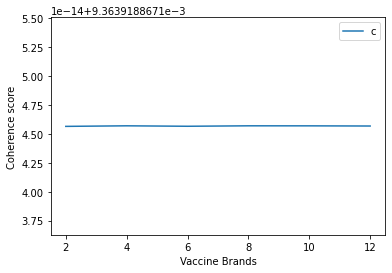

In [25]:
# Show graph
import matplotlib.pyplot as plt

topics_list = [2, 4, 6, 8, 10, 12]
plt.plot(topics_list, coherence_values)
plt.xlabel("Vaccine Brands")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

# Plot Perplexity Scores

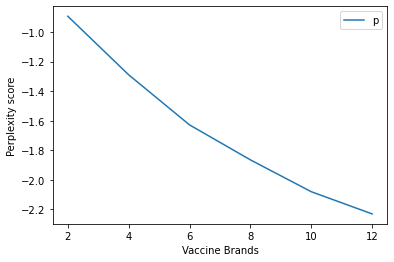

In [32]:
# Show graph
import matplotlib.pyplot as plt

topics_list = [2, 4, 6, 8, 10, 12]
plt.plot(topics_list, perplexity_val)
plt.xlabel("Vaccine Brands")
plt.ylabel("Perplexity score")
plt.legend(("perplexity_values"), loc='best')
plt.show()

### Display Results

In [33]:
# Print the coherence scores
topics_list = [2, 4, 6, 8, 10, 12]
for m, cv, pr in zip(topics_list, coherence_values, perplexity_val):
    print("Vaccine Brands =", m, " has Coherence Value of", round(cv, 4), " has Perplexity of", round(pr, 4))

Vaccine Brands = 2  has Coherence Value of 0.0094  has Perplexity of -0.8927
Vaccine Brands = 4  has Coherence Value of 0.0094  has Perplexity of -1.2891
Vaccine Brands = 6  has Coherence Value of 0.0094  has Perplexity of -1.6281
Vaccine Brands = 8  has Coherence Value of 0.0094  has Perplexity of -1.8648
Vaccine Brands = 10  has Coherence Value of 0.0094  has Perplexity of -2.0803
Vaccine Brands = 12  has Coherence Value of 0.0094  has Perplexity of -2.2306


## Train Model with Best number of topics

In [42]:
best_topic_number = 25
best_model = models.LdaModel(corpus, num_topics=best_topic_number, id2word=dictionary_LDA, passes=4, alpha=0.05, eta=[0.01]*len(dictionary_LDA.keys()))
        

In [43]:
coherencemodel = CoherenceModel(model=best_model, texts=text_data, dictionary=dictionary_LDA, coherence='c_v')
coherence_score = coherencemodel.get_coherence()
perplexity_score = best_model.log_perplexity(corpus)
print("Num Topics =", best_topic_number, " has Coherence Value of", round(coherence_score, 4), " has Perplexity of", round(perplexity_score, 4))
        

Num Topics = 25  has Coherence Value of 0.0094  has Perplexity of -2.9005


In [44]:
# display all topics with weight of all keywords
for i,topic in best_model.show_topics(formatted=True, num_topics=best_topic_number, num_words=20):
    print(str(i)+": "+ topic)
    print()

0: 1.000*"Covaxin" + 0.000*"Johnson" + 0.000*"Pfizer"

1: 1.000*"Pfizer" + 0.000*"Johnson" + 0.000*"Covaxin"

2: 1.000*"Pfizer" + 0.000*"Covaxin" + 0.000*"Johnson"

3: 1.000*"Pfizer" + 0.000*"Johnson" + 0.000*"Covaxin"

4: 1.000*"Pfizer" + 0.000*"Johnson" + 0.000*"Covaxin"

5: 0.553*"Pfizer" + 0.447*"Covaxin" + 0.000*"Johnson"

6: 1.000*"Johnson" + 0.000*"Pfizer" + 0.000*"Covaxin"

7: 1.000*"Pfizer" + 0.000*"Johnson" + 0.000*"Covaxin"

8: 0.552*"Johnson" + 0.448*"Pfizer" + 0.000*"Covaxin"

9: 0.333*"Johnson" + 0.333*"Covaxin" + 0.333*"Pfizer"

10: 1.000*"Pfizer" + 0.000*"Johnson" + 0.000*"Covaxin"

11: 1.000*"Pfizer" + 0.000*"Johnson" + 0.000*"Covaxin"

12: 1.000*"Pfizer" + 0.000*"Covaxin" + 0.000*"Johnson"

13: 1.000*"Pfizer" + 0.000*"Covaxin" + 0.000*"Johnson"

14: 1.000*"Johnson" + 0.000*"Covaxin" + 0.000*"Pfizer"

15: 1.000*"Pfizer" + 0.000*"Johnson" + 0.000*"Covaxin"

16: 0.528*"Johnson" + 0.472*"Pfizer" + 0.000*"Covaxin"

17: 0.601*"Pfizer" + 0.399*"Covaxin" + 0.000*"Johnson"

18

In [45]:
!pip install pyLDAvis==2.1.2

# Visulaize Topics

In [46]:
import pyLDAvis
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import re
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim 
warnings.filterwarnings('ignore')

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(best_model, corpus, dictionary=dictionary_LDA, mds='mmds')
vis

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
14     0.304287 -0.432934       1        1  5.589485
20     0.289872 -0.443441       2        1  5.202926
6      0.281641 -0.449114       3        1  5.139228
24     0.492148  0.249874       4        1  4.983152
0      0.504447  0.220400       5        1  4.872003
4     -0.143406  0.062828       6        1  4.157404
19    -0.143410  0.062829       7        1  4.155093
21    -0.143407  0.062828       8        1  4.134738
11    -0.143409  0.062829       9        1  4.125606
2     -0.143407  0.062828      10        1  4.114696
1     -0.143408  0.062829      11        1  4.112123
7     -0.143413  0.062830      12        1  4.106250
13    -0.143409  0.062829      13        1  4.090254
23    -0.143408  0.062829      14        1  4.072593
15    -0.143407  0.062828      15        1  4.034177
22    -0.143411  0.062830      16        1  4.028778
12    -0.143409  0.062829      17        1  4.012773
18    -0.143412  0.062830      18        1  3.992604
10    -0.143412  0.062830      19        1  3.982394
3     -0.143409  0.062829      20        1  3.915799
8      0.019796 -0.171564      21        1  2.923324
16     0.012352 -0.161924      22        1  2.892124
17     0.032107  0.142951      23        1  2.704149
5      0.053001  0.151785      24        1  2.646386
9      0.161485 -0.048464      25        1  2.011939, topic_info=       Term          Freq         Total Category  logprob  loglift
1   Johnson   3540.000000   3540.000000  Default   3.0000   3.0000
2   Covaxin   2292.000000   2292.000000  Default   2.0000   2.0000
0    Pfizer  12095.000000  12095.000000  Default   1.0000   1.0000
1   Johnson   1002.065672   3540.069053   Topic1  -0.0000   1.6222
2   Covaxin      0.008580   2292.707446   Topic1 -11.6681  -9.6115
..      ...           ...           ...      ...      ...      ...
0    Pfizer    262.185842  12095.224471  Topic24  -0.5931  -0.1995
1   Johnson      0.045930   3540.069053  Topic24  -9.2428  -7.6206
2   Covaxin    120.233511   2292.707446  Topic25  -1.0986   0.9580
1   Johnson    120.237618   3540.069053  Topic25  -1.0986   0.5236
0    Pfizer    120.229383  12095.224471  Topic25  -1.0986  -0.7051

[78 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
2         4  0.389496  Covaxin
2         5  0.380773  Covaxin
2        23  0.084180  Covaxin
2        24  0.092467  Covaxin
2        25  0.052340  Covaxin
1         1  0.283045  Johnson
1         2  0.263554  Johnson
1         3  0.260164  Johnson
1        21  0.081637  Johnson
1        22  0.077400  Johnson
1        25  0.033898  Johnson
0         6  0.061595   Pfizer
0         7  0.061595   Pfizer
0         8  0.061264   Pfizer
0         9  0.061181   Pfizer
0        10  0.061016   Pfizer
0        11  0.060933   Pfizer
0        12  0.060850   Pfizer
0        13  0.060602   Pfizer
0        14  0.060354   Pfizer
0        15  0.059776   Pfizer
0        16  0.059693   Pfizer
0        17  0.059445   Pfizer
0        18  0.059197   Pfizer
0        19  0.059032   Pfizer
0        20  0.058039   Pfizer
0        21  0.019429   Pfizer
0        22  0.020173   Pfizer
0        23  0.024142   Pfizer
0        24  0.021661   Pfizer
0        25  0.009921   Pfizer, R=3, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[15, 21, 7, 25, 1, 5, 20, 22, 12, 3, 2, 8, 14, 24, 16, 23, 13, 19, 11, 4, 9, 17, 18, 6, 10])

# All Topics Probabilities in each Document

In [47]:
# convert all probability distribution into dataframe (we are doing this to also keep topics having 0 probability)
# In other case topics having 0 probability will be misleading
def topics_document_to_dataframe(topics_document, num_topics):
    res = pd.DataFrame(columns=range(num_topics))
    for topic_weight in topics_document:
        res.loc[0, topic_weight[0]] = topic_weight[1]
    return res


In [48]:
# find topic probabilities that model assign to all documents
topics = [best_model[corpus[i]] for i in range(len(text_data))]

In [49]:
# make dataframe of all document probability distribution
document_topic = \
pd.concat([topics_document_to_dataframe(topics_document, num_topics=best_topic_number) for topics_document in topics]) \
  .reset_index(drop=True).fillna(0)

In [ ]:
document_topic.head(10)

,0,1,2,3,4,5,6,7,8,9
0,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
1,0.033333,0.033333,0.033333,0.033333,0.700000,0.033333,0.033333,0.033333,0.033333,0.033333
2,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
3,0.033333,0.033333,0.033333,0.700000,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333
4,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
5,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.700000,0.033333,0.033333,0.033333
6,0.033333,0.033333,0.033333,0.033333,0.700000,0.033333,0.033333,0.033333,0.033333,0.033333
7,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.700000,0.033333,0.033333,0.033333
8,0.033333,0.033333,0.033333,0.033333,0.700000,0.033333,0.033333,0.033333,0.033333,0.033333
9,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000


# Calculate and Find Keywords in each Document


In [ ]:
def format_topics_sentences(ldamodel=best_model, corpus=corpus, texts=text_data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Per_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=best_model, corpus=corpus, texts=text_data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,0.0,0.1,"borisjohnson, pfizer, johnson, pfizervaccine, ...",[moderna]
1,1,6.0,0.7,"pfizer, pfizercovidvaccine, modernapfizer, joh...","[pfizer, moderna]"
2,2,0.0,0.1,"borisjohnson, pfizer, johnson, pfizervaccine, ...",[moderna]
3,3,4.0,0.7,"pfizer, pfizervaccine, johnsonandjohnsonvaccin...","[pfizer, moderna]"
4,4,0.0,0.1,"borisjohnson, pfizer, johnson, pfizervaccine, ...",[moderna]
5,5,3.0,0.7,"pfizer, johnson, teammoderna, johnsonandjohnso...","[pfizer, moderna]"
6,6,4.0,0.7,"pfizer, pfizervaccine, johnsonandjohnsonvaccin...","[pfizer, moderna]"
7,7,6.0,0.7,"pfizer, pfizercovidvaccine, modernapfizer, joh...","[pfizer, moderna]"
8,8,4.0,0.7,"pfizer, pfizervaccine, johnsonandjohnsonvaccin...","[pfizer, moderna]"
9,9,0.0,0.1,"borisjohnson, pfizer, johnson, pfizervaccine, ...",[moderna]
